In [ ]:
import pandas as pd 
import yfinance as yf

In [4]:
dir(yf)

['AsyncWebSocket',
 'EquityQuery',
 'FundQuery',
 'Industry',
 'Lookup',
 'Market',
 'PREDEFINED_SCREENER_QUERIES',
 'Search',
 'Sector',
 'Ticker',
 'Tickers',
 'WebSocket',
 'YfData',
 '_NOTSET',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'live',
 'lookup',
 'multi',
 'pricing_pb2',
 'scrapers',
 'screen',
 'screener',
 'search',
 'set_config',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

In [ ]:
tdg = yf.Ticker('tdg')
tdg

In [ ]:
import pandas as pd 
import yfinance as yf

List_stocks = {'AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM'}

# Create a ticker object for Apple
ticker = yf.Ticker("NVDA")

# You can now access all kinds of data through this object
print(ticker.info)        # company info
print(ticker.history())   # historical prices
print(ticker.dividends)   # dividend history

# How to fetch price with yfinance

In [97]:

#  intervals -> 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1d(defult), 5d, 1wk, 1mo, 3mo
ticker = "NVDA"

# Option 1: Specify start and end dates
data = yf.download(ticker, start="2025-01-01", end="2025-10-24" , interval="1d")

# Option 2: Specify a relative period
#data = yf.download(ticker, period="6mo")  # last 6 months

C:\Users\Ali\AppData\Local\Temp\ipykernel_23676\2869208142.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2025-01-01", end="2025-10-24" , interval="1d")
[*********************100%***********************]  1 of 1 completed


In [84]:
type(data)

data.head(4) # its defult is 5 rows

#print(data.isnull().values.any()) # null

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-01-06,149.397446,152.126862,147.787811,148.557632,265377400
2025-01-16,133.540909,138.719773,133.460924,138.609796,209235600
2025-01-21,140.799332,141.799114,137.060141,139.129697,197749000
2025-01-31,120.043854,127.822158,119.164048,123.753045,388161100


In [ ]:

Close_prices = list(data["Close"]["NVDA"])
#print(Close_prices)

Open_prices = list(data["Open"]["NVDA"])
#print(Open_prices)

len(Open_prices) == len(Close_prices)

True

# Types of Return

Absolute Return

- Total gain or loss on an investment over a period, expressed in currency or percentage.

- Formula: (P_end - P_start)/ P_start

In [98]:
abs_return_df = data[["Close" , "Open"]]
abs_return_df = abs_return_df.assign(Absolute_Return =lambda x: (x["Close"]-x["Open"])/x["Close"])

# iloc

iloc = abs_return_df.iloc[0]["Absolute_Return"]
# loc
#print(abs_return_df.index)
temp = abs_return_df.index
loc = abs_return_df.loc[temp[0],"Absolute_Return"]

loc == iloc

Ticker
    True
Name: 2025-01-02 00:00:00, dtype: bool

Return Function

In [109]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM']
data = yf.download(tickers, start="2025-01-01", end="2025-10-24" , interval="1d")
data["Close"]["AAPL"]

C:\Users\Ali\AppData\Local\Temp\ipykernel_23676\2279842882.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2025-01-01", end="2025-10-24" , interval="1d")
[*********************100%***********************]  5 of 5 completed


Date
2025-01-02    242.987411
2025-01-03    242.499146
2025-01-06    244.133347
2025-01-07    241.353210
2025-01-08    241.841476
                 ...    
2025-10-17    252.289993
2025-10-20    262.239990
2025-10-21    262.769989
2025-10-22    258.450012
2025-10-23    259.579987
Name: AAPL, Length: 203, dtype: float64

In [119]:
def Returns_Stocks (tikers):
    data = yf.download(tickers, start="2025-01-01", end="2025-10-24" , interval="1mo")
    abs_returns_df = {}
    for tiker in tikers:
        Close_prices = list(data["Close"][tiker])
        #print(Close_prices)

        Open_prices = list(data["Open"][tiker])
        #print(Open_prices)
        abs_return = [(Close_prices[i]-Open_prices[i])/Open_prices[i] for i in range(len(Open_prices)) ]
        abs_returns_df [tiker] =  abs_return 
    abs_returns_df = pd.DataFrame(abs_returns_df)
    return abs_returns_df

tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM']
Returns_Stocks(tickers)



C:\Users\Ali\AppData\Local\Temp\ipykernel_23676\1518764088.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2025-01-01", end="2025-10-24" , interval="1mo")
[*********************100%***********************]  5 of 5 completed


,AAPL,MSFT,NVDA,GOOGL,IBM
0,-0.051942,-0.024605,-0.117132,0.070129,0.152736
1,0.051524,-0.035496,0.088627,-0.151527,0.000159
2,-0.081310,-0.058748,-0.122500,-0.100564,-0.023867
3,-0.033256,0.055011,0.003686,0.033720,-0.025037
4,-0.039363,0.067848,0.194995,0.070365,0.072979
5,0.024416,0.088091,0.166064,0.049988,0.143223
6,0.004355,0.074587,0.138077,0.091954,-0.140553
7,0.100868,-0.052916,0.000517,0.126329,-0.031502
8,0.110709,0.034927,0.097529,0.166283,0.171274
9,0.017801,0.011189,-0.016627,0.051215,0.017131


# DF.Plot()

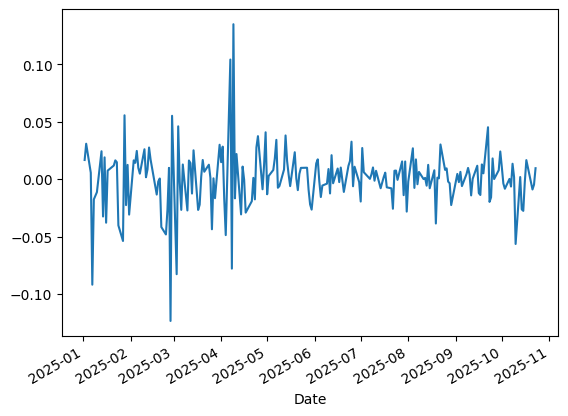

In [99]:
import matplotlib.pyplot as plt

abs_return_df["Absolute_Return"].plot()
plt.show()

C:\Users\Ali\AppData\Local\Temp\ipykernel_23676\1518764088.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2025-01-01", end="2025-10-24" , interval="1mo")
[*********************100%***********************]  5 of 5 completed


<function matplotlib.pyplot.show(close=None, block=None)>

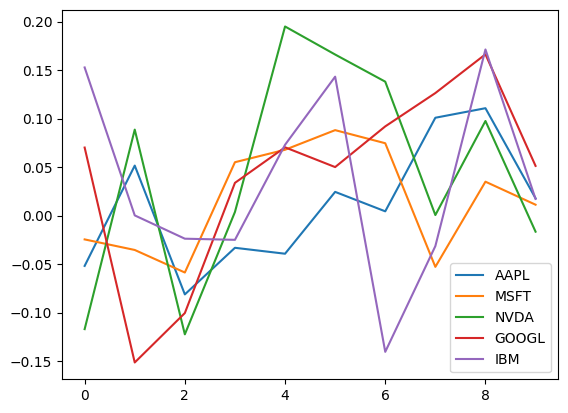

In [120]:
Returns_Stocks(tickers).plot()
plt.show

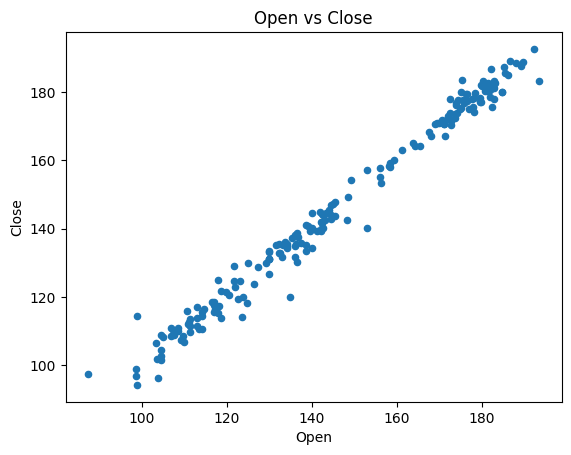

In [100]:
abs_return_df.plot(x="Open", y="Close", kind="scatter", title="Open vs Close")
plt.show()


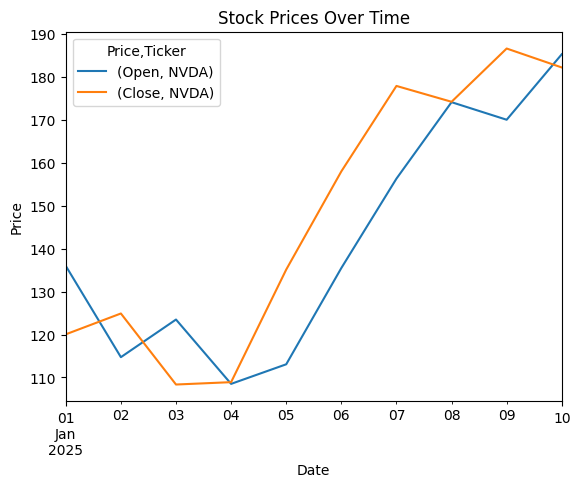

In [94]:
abs_return_df["Date"] = pd.date_range(start="2025-01-01", periods=10)
abs_return_df.set_index("Date", inplace=True)

abs_return_df[["Open", "Close"]].plot(title="Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


# Risks

In [106]:
Returns = list(abs_return_df["Absolute_Return"])
#print(Returns)
mean_returns = sum(Returns)/len(Returns)
Var_returns = (sum([(i-mean_returns)**2 for i in Returns])/len(Returns))**1/2
print(Var_returns) 
Annualized_Volatility = Var_returns * 252**1/2
Annualized_Volatility

0.0003465205761718972


0.043661592597659046

Risk Function

In [121]:
def Risk_Stocks (tikers):
    data = yf.download(tickers, start="2025-01-01", end="2025-10-24" , interval="1d")
    abs_returns_df = {}
    for tiker in tikers:
        Close_prices = list(data["Close"][tiker])
        #print(Close_prices)

        Open_prices = list(data["Open"][tiker])
        #print(Open_prices)
        abs_return = [(Close_prices[i]-Open_prices[i])/Open_prices[i] for i in range(len(Open_prices)) ]
        abs_returns_df [tiker] =  abs_return 
    
    risk_stocks = {}
    for key in abs_returns_df.keys():
        Returns = abs_returns_df[key]
        #print(Returns)
        mean_returns = sum(Returns)/len(Returns)
        Var_returns = (sum([(i-mean_returns)**2 for i in Returns])/len(Returns))**1/2
        #print(Var_returns) 
        Annualized_Volatility = Var_returns * 252**1/2
        #Annualized_Volatility
        risk_stocks [key] = {"Var_returns" : Var_returns , "Annualized_Volatility" : Annualized_Volatility}
    risk_stocks_df = pd.DataFrame(risk_stocks)
        
    return risk_stocks_df

tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM']
Risk_Stocks(tickers)


C:\Users\Ali\AppData\Local\Temp\ipykernel_23676\1807552404.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2025-01-01", end="2025-10-24" , interval="1d")
[*********************100%***********************]  5 of 5 completed


,AAPL,MSFT,NVDA,GOOGL,IBM
Var_returns,0.000181,0.000087,0.000352,0.000136,0.000128
Annualized_Volatility,0.022815,0.011017,0.044369,0.017199,0.016141


Risk on time frame

In [ ]:
def Risk_Stocks (tikers , time_frame , shift_step):
    data = yf.download(tickers, start="2025-01-01", end="2025-10-24" , interval="1d")
    abs_returns_df = {}
    for tiker in tikers:
        Close_prices = list(data["Close"][tiker])
        #print(Close_prices)

        Open_prices = list(data["Open"][tiker])
        #print(Open_prices)
        abs_return = [(Close_prices[i]-Open_prices[i])/Open_prices[i] for i in range(len(Open_prices)) ]
        abs_returns_df [tiker] =  abs_return 
    
    risk_stocks = {}
    for key in abs_returns_df.keys():
        Returns = abs_returns_df[key]
        #print(Returns)
        mean_returns = sum(Returns)/len(Returns)
        Var_returns = (sum([(i-mean_returns)**2 for i in Returns])/len(Returns))**1/2
        #print(Var_returns) 
        Annualized_Volatility = Var_returns * 252**1/2
        #Annualized_Volatility
        risk_stocks [key] = {"Var_returns" : Var_returns , "Annualized_Volatility" : Annualized_Volatility}
    risk_stocks_df = pd.DataFrame(risk_stocks)
        
    return risk_stocks_df

tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM']
Risk_Stocks(tickers)